In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import StandardScaler
#import os 

In [114]:
df = pd.read_csv('elnino.csv')
df.head()

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19


In [115]:
df.columns = [col.strip() for col in df.columns]

In [116]:
df.isna().sum()

Observation         0
Year                0
Month               0
Day                 0
Date                0
Latitude            0
Longitude           0
Zonal Winds         0
Meridional Winds    0
Humidity            0
Air Temp            0
Sea Surface Temp    0
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Observation       178080 non-null  int64  
 1   Year              178080 non-null  int64  
 2   Month             178080 non-null  int64  
 3   Day               178080 non-null  int64  
 4   Date              178080 non-null  int64  
 5   Latitude          178080 non-null  float64
 6   Longitude         178080 non-null  float64
 7   Zonal Winds       178080 non-null  object 
 8   Meridional Winds  178080 non-null  object 
 9   Humidity          178080 non-null  object 
 10  Air Temp          178080 non-null  object 
 11  Sea Surface Temp  178080 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 16.3+ MB


In [118]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
178075    False
178076    False
178077    False
178078    False
178079    False
Length: 178080, dtype: bool

In [119]:
df.duplicated().sum()

0

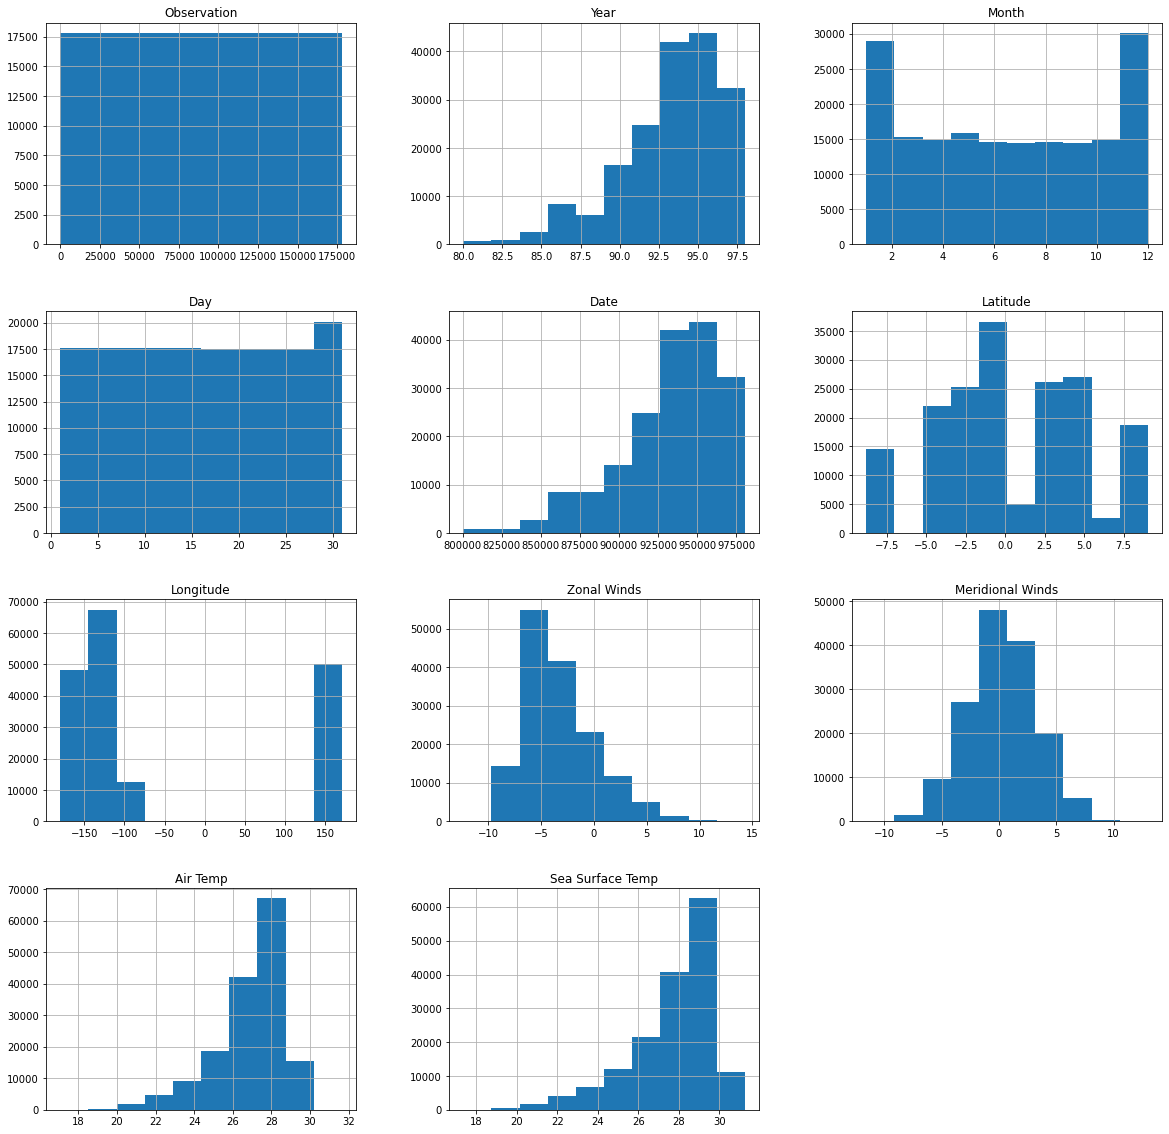

In [151]:
p = df.hist(figsize = (20,20))

In [150]:
df.describe()

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Air Temp,Sea Surface Temp
count,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,152917.000000,152918.000000,159843.000000,161073.000000
mean,89040.500000,93.302325,6.504869,15.720536,933689.455374,0.473626,-54.025233,-3.304772,0.249762,26.887567,27.715309
std,51407.412306,3.393818,3.459657,8.800487,33900.474320,4.583041,135.363994,3.373492,2.999202,1.816429,2.057428
min,1.000000,80.000000,1.000000,1.000000,800307.000000,-8.810000,-180.000000,-12.400000,-11.600000,17.050000,17.350000
25%,44520.750000,92.000000,4.000000,8.000000,920116.000000,-2.010000,-154.950000,-5.800000,-1.700000,26.060000,26.770000
50%,89040.500000,94.000000,6.000000,16.000000,940601.000000,0.010000,-111.260000,-4.000000,0.300000,27.340000,28.290000
75%,133560.250000,96.000000,10.000000,23.000000,960617.000000,4.980000,147.010000,-1.400000,2.300000,28.180000,29.230000
max,178080.000000,98.000000,12.000000,31.000000,980623.000000,9.050000,171.080000,14.300000,13.000000,31.660000,31.260000


In [121]:
# Air Temp summary statistics
df['Air Temp'] = pd.to_numeric(df['Air Temp'], errors='coerce')
df['Air Temp'].describe()

count    159843.000000
mean         26.887567
std           1.816429
min          17.050000
25%          26.060000
50%          27.340000
75%          28.180000
max          31.660000
Name: Air Temp, dtype: float64

In [122]:
# Sea Surface Temp summary statistics
df['Sea Surface Temp'] = pd.to_numeric(df['Sea Surface Temp'], errors='coerce')
df['Sea Surface Temp'].describe()

count    161073.000000
mean         27.715309
std           2.057428
min          17.350000
25%          26.770000
50%          28.290000
75%          29.230000
max          31.260000
Name: Sea Surface Temp, dtype: float64

In [123]:
df.isna().sum()

Observation             0
Year                    0
Month                   0
Day                     0
Date                    0
Latitude                0
Longitude               0
Zonal Winds             0
Meridional Winds        0
Humidity                0
Air Temp            18237
Sea Surface Temp    17007
dtype: int64

C:\Users\maarm\anaconda3\envs\metis\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


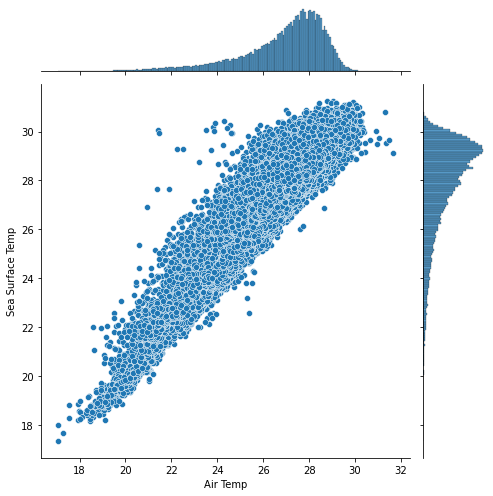

In [124]:
sns.jointplot(x="Air Temp", y="Sea Surface Temp", data=df, size=7)

In [7]:
#sns.pairplot(df)

### ......................................................................................................................................................................................

### Modeling

In [ ]:
# LSTM Model

In [6]:

import os.path
import warnings
from math import sqrt
from sklearn.metrics import mean_squared_error
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.models import load_model
warnings.filterwarnings('ignore')

#### define a method that trains a LSTM model. For the purpose of simplicity, we define a two layer neural network with one LSTM layer and one dense layer.

In [ ]:
""""
This method takes training data and returns a LSTM model
train: training data
n_lag: number of previous time steps
n_ahead: number of next time steps
nb_epoch: number of epochs
n_neurons: number of n_neurons in the first layer
"""
def fit_lstm(train, n_lag, n_ahead, n_batch, nb_epoch, n_neurons):
    # reshape training into [samples, timesteps, features]
    X, y = train[:, :-n_ahead], train[:, -n_ahead:]
    X = X.reshape(X.shape[0], n_lag, int(X.shape[1]/n_lag))

    # design neural network architecture. This is a simple LSTM just for demo purpose
    model = Sequential()
    model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(n_ahead))
    model.compile(loss='mean_squared_error', optimizer='adam')
    # fit the NN
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=n_batch, verbose=2, shuffle=False)
        model.reset_states()
    return model

#### Let's split our transformed data into training and test sets and feed the model training method. The first 80 precent will be used for training purpose and the last 20 percent will be using as test set. Note that in time sereis analysis, we don't do random shuffle because it's important to preserve time dependency/order

In [ ]:
values = reframed.values
n_train = int(len(values) * 0.8)
train = values[:n_train, :]
test = values[n_train:, :]

# fit a LSTM model with the transformed data
# model fitting can be very time-consuming, therefore a pre-trained model is included in the data folder
model_path = os.path.join('.', 'data', 'my_model.h5')
if not os.path.exists(model_path):
    model = fit_lstm(train, lag, ahead, 1, 30, 30)
    model.save(model_path)
else:
    model = load_model(model_path)

### ...............................................................................................................................................................